In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
# data will come from a known dist
# check out answer
def generate_batch(batch_size=32):
    #x in (-5, +5)

    x= np.random.random(batch_size)*10-5

    # sd func of x
    sd=0.05 + 0.1 *(x+5)

    # target=mean+noise*sd
    y=np.cos(x) - 0.3 + np.random.rand(batch_size)*sd

    return x,y

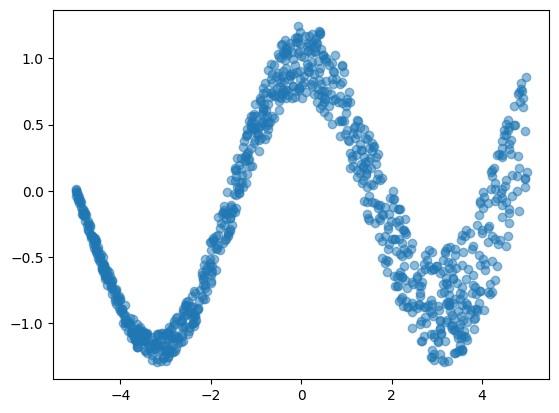

In [4]:
#visualize the data
x, y= generate_batch(1024)
plt.scatter(x,y, alpha=0.5)

In [5]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()

        self.ann1=nn.Sequential(
            nn.Linear(1,10),
            nn.Tanh(),
            nn.Linear(10,1),
        )

        self.ann2=nn.Sequential(
            nn.Linear(1,10),
            nn.Tanh(),
            nn.Linear(10,1),
        )

    def forward(self,inputs):
        #returns mean and log var
        return self.ann1(inputs), self.ann2(inputs)

In [6]:
model=Model()

In [7]:
def criterion(outputs,targets):
    mu=outputs[0]
    v=torch.exp(outputs[1])

    #coefff
    c=torch.log(torch.sqrt(2*np.pi*v))

    #exponent term
    f=0.5 / v*(targets-mu)**2

    #mean log likelihood
    n11=torch.mean(c+f)

    return n11

In [8]:
optimizer=torch.optim.Adam(model.parameters())

In [9]:
n_epochs=5000
batch_size=128

losses=np.zeros(n_epochs)

for i in range(n_epochs):
    x,y=generate_batch(batch_size)

    #conver to torch tensor
    inputs=torch.from_numpy(x).float()
    targets=torch.from_numpy(y).float()

    #reshape data
    inputs,targets=inputs.view(-1,1), targets.view(-1,1)

    #zero the grads
    optimizer.zero_grad()

    #forward pass
    outputs=model(inputs)
    loss=criterion(outputs,targets)

    #store loss
    losses[i]= loss.item()

    #print loss
    if i % 1000 ==0:
        print(i,losses[i])

    #optimize
    loss.backward()
    optimizer.step()

0 1.4344136714935303
1000 -0.008783113211393356
2000 -0.24904970824718475
3000 -0.20989643037319183
4000 -0.22725257277488708


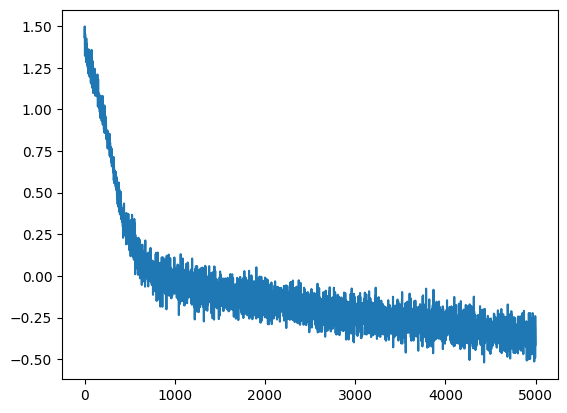

In [10]:
plt.plot(losses);

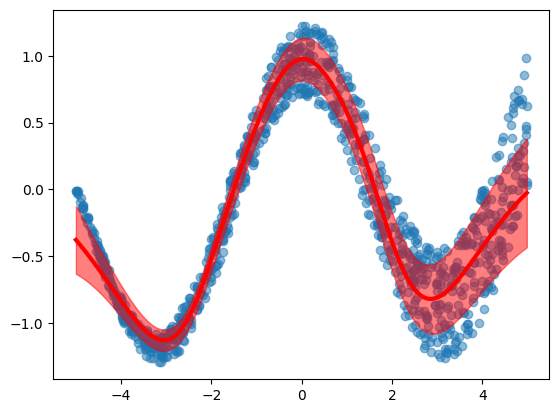

In [13]:
#plot the model preds

x,y = generate_batch(1024)
plt.scatter(x,y, alpha=0.5)

#conver to touch tensor
inputs=torch.from_numpy(x).float()
targets=torch.from_numpy(y).float()

#reshape data
inputs, targets = inputs.view(-1,1), targets.view(-1,1)

with torch.no_grad():
    outputs=model(inputs)
    yhat=outputs[0].numpy().flatten()
    sd=np.exp(outputs[1].numpy().flatten() / 2)# encodede variance by default


idx=np.argsort(x)

plt.plot(x[idx],yhat[idx],linewidth=3,color="red")
plt.fill_between(x[idx],yhat[idx]-sd[idx],yhat[idx]+sd[idx],color="red", alpha=0.5)
plt.show()

